<a href="https://colab.research.google.com/github/stutimongia2024/MLnow_2.0/blob/main/01_Univariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Univariate Linear Regression

[Link to download the dataset used](https://docs.google.com/spreadsheets/d/1JlzmaNU8IX-k4x_YwctTpt3LwyZf8wssEGcAQBEwt7o/edit#gid=1228793274)

Author: Stuti Mongia

Mentor: Shivani Shimpi

##Setup

In [68]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
cd '/content/drive/MyDrive/LiveCodeSession/EDA'

/content/drive/MyDrive/LiveCodeSession/EDA


In [70]:
ls


StudentsPerformance.csv     univariate_MathData_2.csv
StudentsPerformance.gsheet  Untitled0.ipynb


In [71]:
import os


In [72]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [73]:
mathData = pd.read_csv('StudentsPerformance.csv', sep=',') #load the csv file as dataframe

In [74]:
mathData.head(10) #print the first ten rows of the dataframe

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


We are just going to consider the columns reading score and math score for univariate linear regression

In [75]:
uniMathData = mathData[['reading score', 'math score']]
uniMathData.head(5)


,reading score,math score
0,72,72
1,90,69
2,95,90
3,57,47
4,78,76


In [76]:
uniMathData.to_csv('univariate_MathData_2.csv')

In [77]:
ls

StudentsPerformance.csv     univariate_MathData_2.csv
StudentsPerformance.gsheet  Untitled0.ipynb


##Data Visulaization

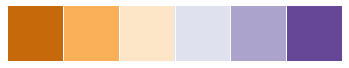

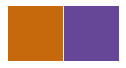

In [78]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr')) #Purple to Orange colors
pal = sns.color_palette('PuOr', 6) #print 6 color shades from Purple to Orange
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697'] #orange Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [79]:
uniMathData.columns #columns in the dataframe

Index(['reading score', 'math score'], dtype='object')

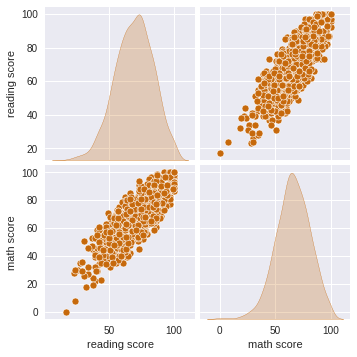

In [80]:
#pairplot for all the values

sns.pairplot(uniMathData,
             x_vars = ['reading score', 'math score'],
             y_vars =  ['reading score', 'math score'],
       diag_kind='kde'
             )

##Data Splits

In [81]:
#80-20 train-test percent split

trainDataset = uniMathData.sample(frac=0.8, random_state=0) 
testDataset = uniMathData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     reading score  math score
993             72          62
859             73          87
298             46          40
553             62          77
672             78          69
    reading score  math score
9              60          38
11             52          40
19             58          54
23             73          69
28             70          70


In [82]:
print(trainDataset.shape)
print(testDataset.shape)

(800, 2)
(200, 2)


In [83]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     reading score  math score
993             72          62
859             73          87
298             46          40
553             62          77
672             78          69
    reading score  math score
9              60          38
11             52          40
19             58          54
23             73          69
28             70          70


In [84]:
#removing the math score column and saving it into the labels variable

trainLabels = trainFeatures.pop('math score')
testLabels = testFeatures.pop('math score')

print(trainLabels.head())
print(testLabels.head())

993    62
859    87
298    40
553    77
672    69
Name: math score, dtype: int64
9     38
11    40
19    54
23    69
28    70
Name: math score, dtype: int64


In [85]:
print(trainFeatures.head())
print(testFeatures.head())

     reading score
993             72
859             73
298             46
553             62
672             78
    reading score
9              60
11             52
19             58
23             73
28             70


In [86]:
# univariate -> num(features) = 1
# multvariate -> num(features) > 1 = 11


model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

In [87]:
model.compile(
    loss = 'mean_absolute_error', #minimizing the MAE loss
    optimizer = tf.keras.optimizers.Adam(0.001), #learning rate specified as 0.001
    # optimizer = 'adam', #takes the default learning rate
    metrics = ['mae', 'mse'] #meanSquare and meanAbsolute error metrics
)

In [88]:
numEpochs = 3000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
25/25 [==============================] - 0s 3ms/step - loss: 7.1831 - mae: 7.1831 - mse: 78.0601 - val_loss: 6.9452 - val_mae: 6.9452 - val_mse: 75.0404
Epoch 502/3000
25/25 [==============================] - 0s 3ms/step - loss: 7.1838 - mae: 7.1838 - mse: 78.1451 - val_loss: 6.9491 - val_mae: 6.9491 - val_mse: 74.9683
Epoch 503/3000
25/25 [==============================] - 0s 2ms/step - loss: 7.1809 - mae: 7.1809 - mse: 78.1021 - val_loss: 6.9453 - val_mae: 6.9453 - val_mse: 75.0287
Epoch 504/3000
25/25 [==============================] - 0s 3ms/step - loss: 7.1799 - mae: 7.1799 - mse: 77.9883 - val_loss: 6.9474 - val_mae: 6.9474 - val_mse: 74.9820
Epoch 505/3000
25/25 [==============================] - 0s 2ms/step - loss: 7.1865 - mae: 7.1865 - mse: 78.2754 - val_loss: 6.9457 - val_mae: 6.9457 - val_mse: 75.1426
Epoch 506/3000
25/25 [==============================] - 0s 2ms/step - loss: 7.1768 - mae: 7.1768 - mse: 78.09

In [89]:
print(history)

In [90]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


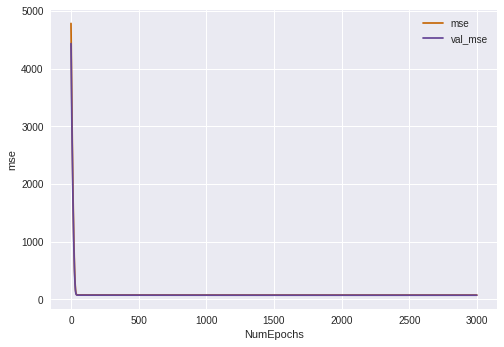

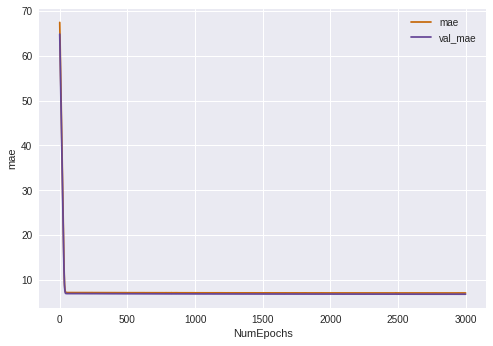

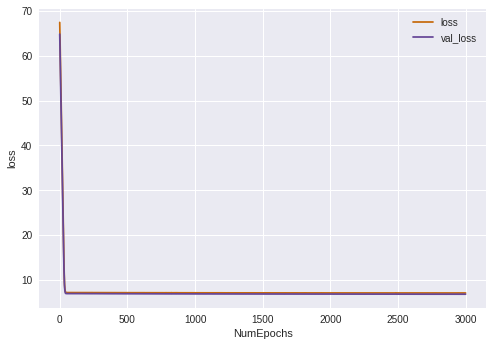

In [91]:
# tempString = 'mse'
def curvePlots(tempString):
  plt.plot(history.history[tempString])
  plt.plot(history.history[f'val_{tempString}'])
  plt.xlabel('NumEpochs')
  plt.ylabel(tempString)
  plt.legend([tempString, f'val_{tempString}'])
  plt.show()


curvePlots('mse')
curvePlots('mae')
curvePlots('loss')

In [92]:
model.predict([1])

array([[7.415781]], dtype=float32)

In [93]:
# testPreds = model.predict(testFeatures).flatten() #array of all prediction values

#for single values

print(f'Prediction for input value 1: {model.predict([1])}')


# for a list of values
tempListforPreds = [1,2,3,4,5]
print(f'''

input List = {tempListforPreds}


List of Predictions:
{model.predict(tempListforPreds)}

List of Predictions (flattened out):
{model.predict(tempListforPreds).flatten()}
''')

Prediction for input value 1: [[7.415781]]


input List = [1, 2, 3, 4, 5]


List of Predictions:
[[ 7.415781]
 [ 8.272611]
 [ 9.12944 ]
 [ 9.98627 ]
 [10.8431  ]]

List of Predictions (flattened out):
[ 7.415781  8.272611  9.12944   9.98627  10.8431  ]



In [94]:
print(testFeatures)

     reading score
9               60
11              52
19              58
23              73
28              70
..             ...
962            100
966             68
976             62
980             24
983             87

[200 rows x 1 columns]


In [95]:
testPreds = model.predict(testFeatures).flatten() #array of all prediction values

In [96]:

print(len(testPreds))
print(testPreds)

200
[57.968727 51.11409  56.25507  69.10751  66.53702  68.25068  75.96215
 69.10751  56.25507  62.252876 67.39385  73.39166  53.684578 57.111897
 60.539215 50.25726  48.543602 46.829945 39.975307 77.675804 67.39385
 35.69116  80.2463   75.96215  63.966534 63.966534 72.53483  65.68019
 55.39824  76.81898  78.53264  38.261646 58.825558 43.402626 64.823364
 70.821175 63.966534 66.53702  70.821175 50.25726  72.53483  64.823364
 49.400433 65.68019  51.11409  61.396046 54.54141  75.96215  65.68019
 58.825558 68.25068  49.400433 69.96434  61.396046 69.10751  72.53483
 74.24849  42.545795 71.678    66.53702  73.39166  60.539215 51.11409
 76.81898  70.821175 69.10751  57.968727 41.688965 63.966534 51.11409
 61.396046 80.2463   51.97092  45.973114 70.821175 64.823364 83.673615
 61.396046 72.53483  69.10751  89.671425 87.95776  48.543602 73.39166
 61.396046 63.966534 60.539215 67.39385  77.675804 79.389465 63.109703
 68.25068  69.10751  76.81898  45.973114 79.389465 62.252876 52.82775
 80.2463   

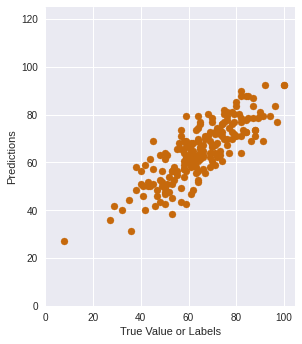

In [97]:
# prediciton plot --> how well is your model predicting across the actual labels

def predPlot(labels, predictions):
  plt.scatter(labels, predictions)
  plt.ylabel('Predictions')
  plt.xlabel('True Value or Labels')
  plt.axis('equal')
  plt.axis('square')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.show()

predPlot(testLabels, testPreds)

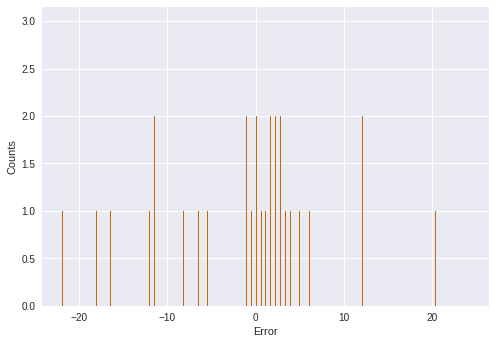

In [98]:
#error plot --> gaussian distribution 

def errorPlot(preds, labels, counts):
  errors = preds - labels
  plt.hist(errors, counts)
  plt.xlabel('Error')
  plt.ylabel('Counts')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)